In [1]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed

Populating the interactive namespace from numpy and matplotlib


In [2]:
def myf(x):
    return (2*x)**2

In [3]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]

In [4]:
max_iter = 15

In [5]:
myProblem = GPyOpt.methods.BayesianOptimization(myf,bounds)

In [6]:
myProblem.run_optimization(max_iter)

In [7]:
myProblem.x_opt

array([-0.00497193])

In [8]:
myProblem.fx_opt

array([  9.88805026e-05])

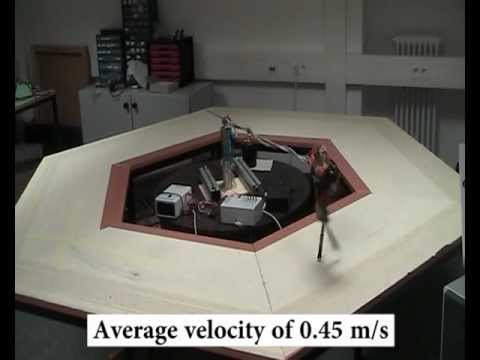

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('ualnbKfkc3Q')

In [49]:
f_true= GPyOpt.objective_examples.experiments1d.forrester()          # noisy version
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,1)}]  # problem constrains 

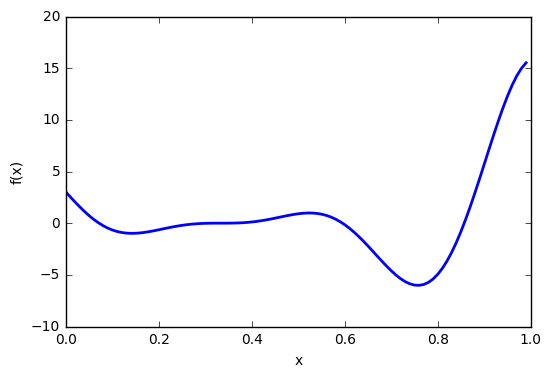

In [50]:
f_true.plot()

In [55]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
myBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,            # function to optimize       
                                             domain=bounds,        # box-constrains of the problem
                                             acquisition_type='EI',
                                             exact_feval = True,
                                            ) # Selects the Expected improvement

In [56]:
# Run the optimization
max_iter = 5     # evaluation budget
max_time = 60     # time budget 
eps      = 1  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter, max_time, eps)      

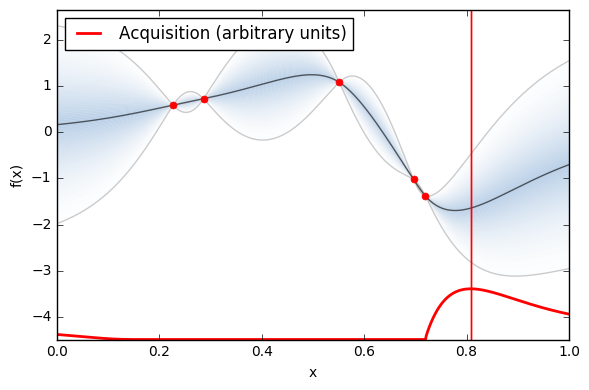

In [57]:
myBopt.plot_acquisition()

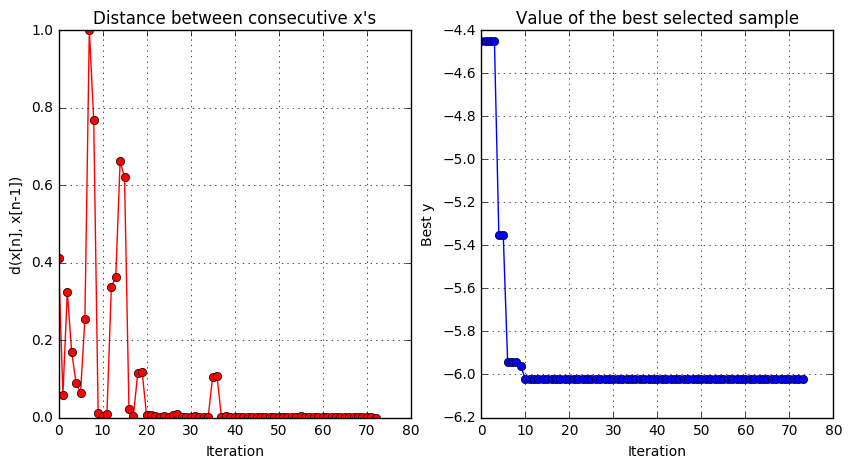

In [47]:
myBopt.plot_convergence()

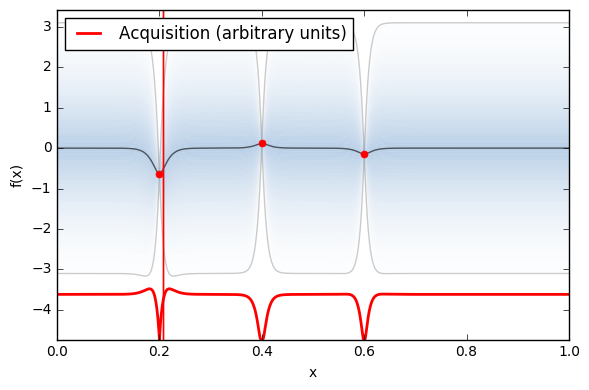

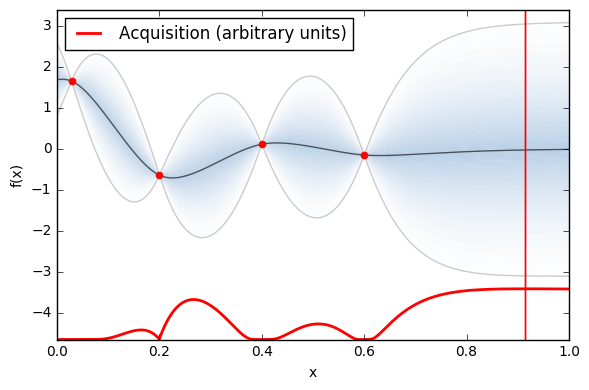

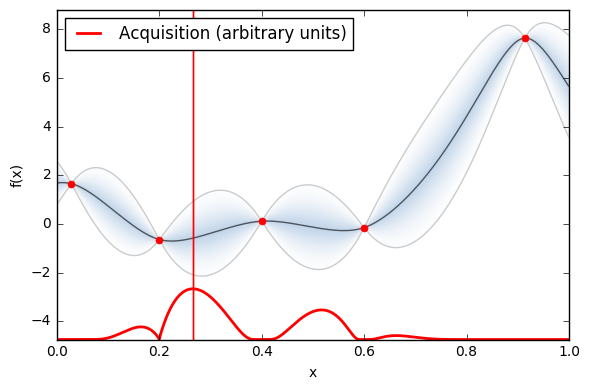

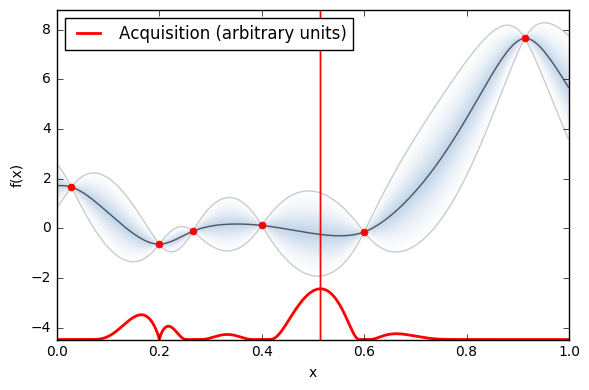

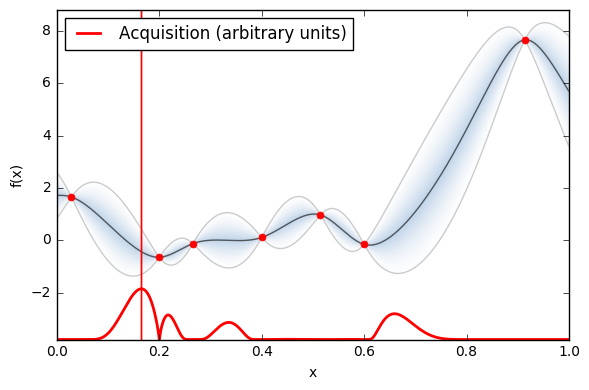

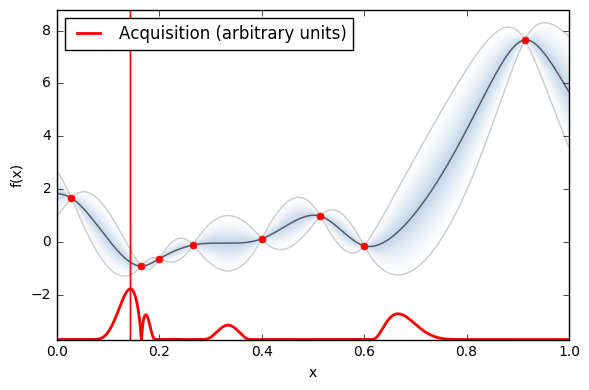

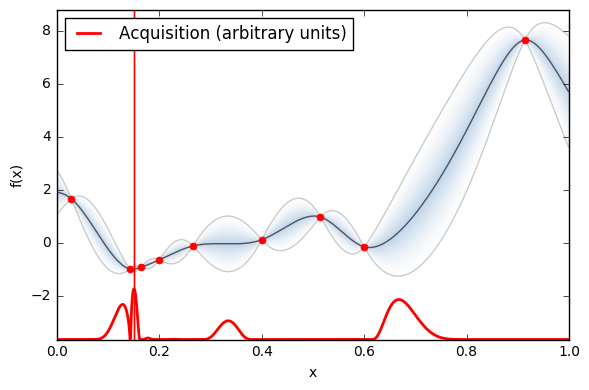

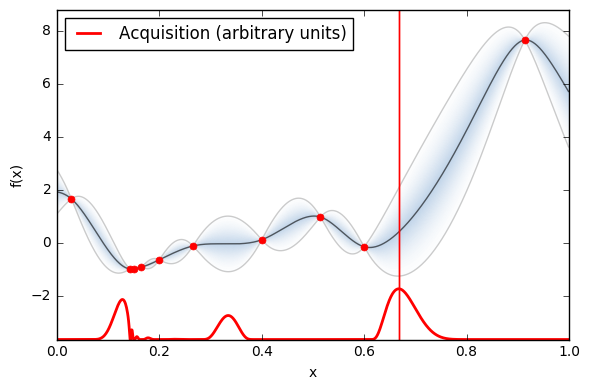

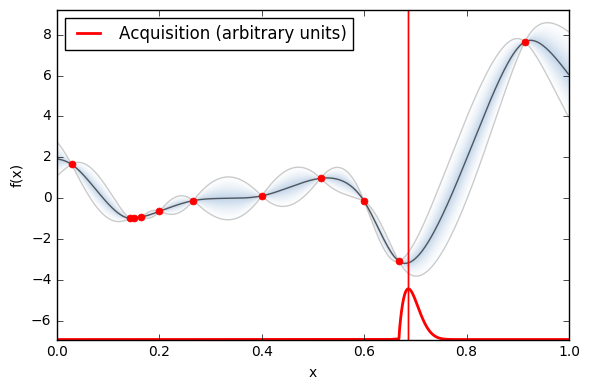

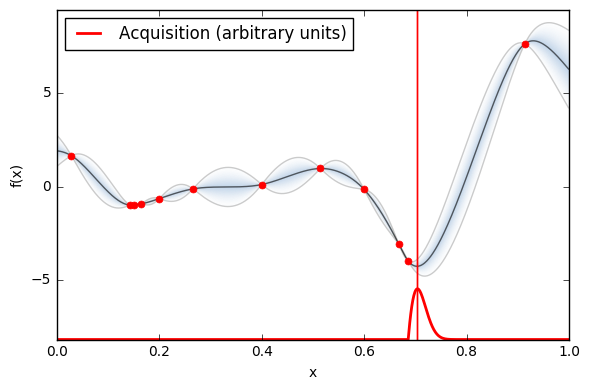

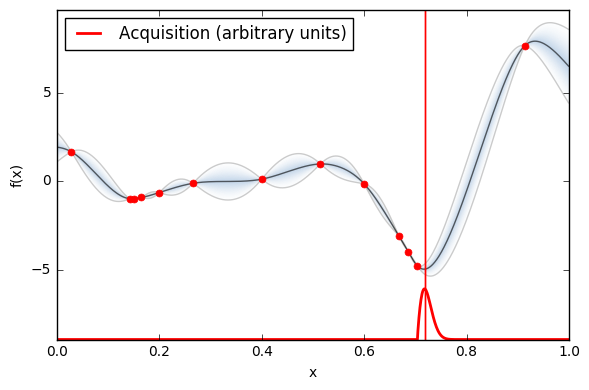

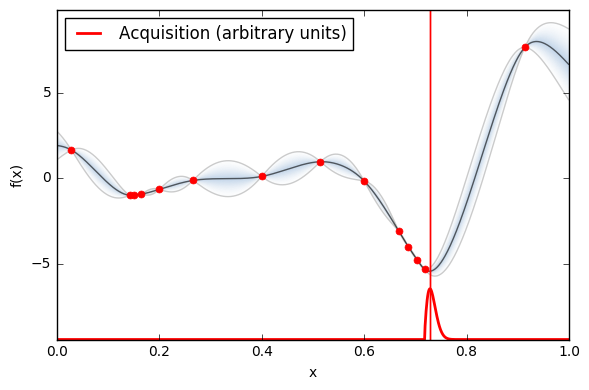

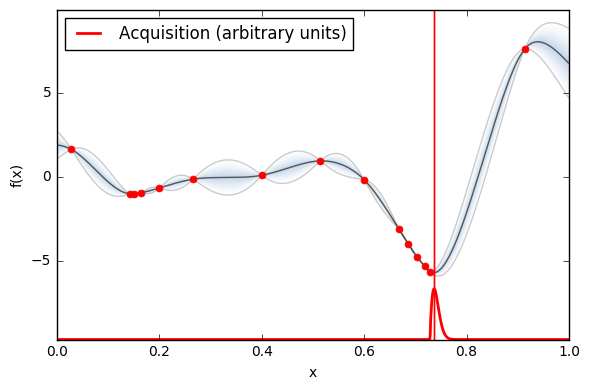

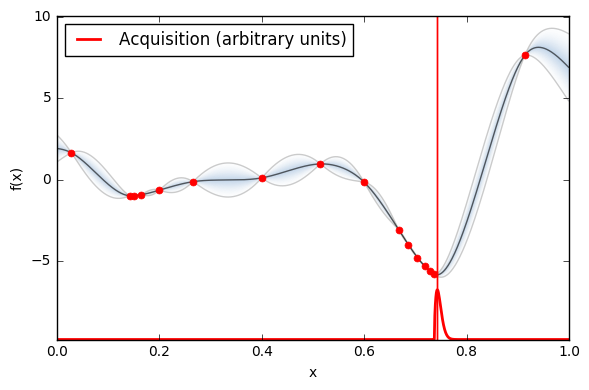

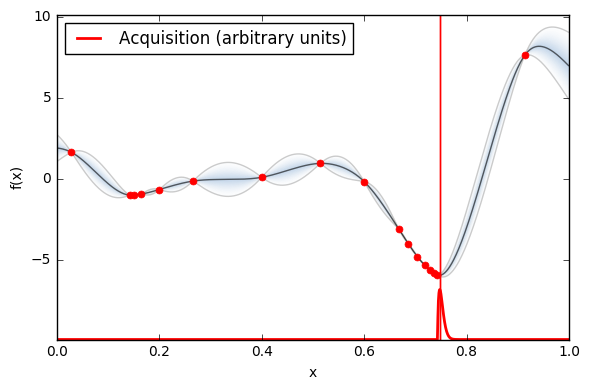

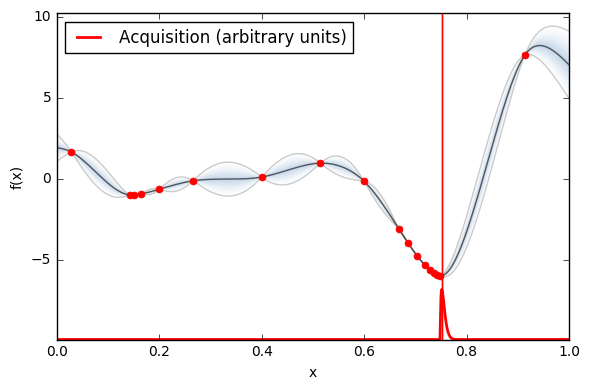

In [48]:
# starts the optimization, 
import numpy as np
X_initial = np.array([[0.2],[0.4],[0.6]])

iterBopt = GPyOpt.methods.BayesianOptimization(f=f_true.f,                 
                                             domain=bounds,        
                                             acquisition_type='EI',
                                             X = X_initial,
                                             exact_feval = True,
                                             normalize_Y = False,
                                             acquisition_jitter = 0.01)

iterBopt.model.model.kern.variance.constrain_fixed(2.5)

iterBopt.plot_acquisition('../imgs/iteration%.03i.png' % (0))

from IPython.display import clear_output
N_iter = 15

for i in range(N_iter):
    clear_output()
    iterBopt.run_optimization(max_iter=1) 
    iterBopt.plot_acquisition('../imgs/iteration%.03i.png' % (i + 1))


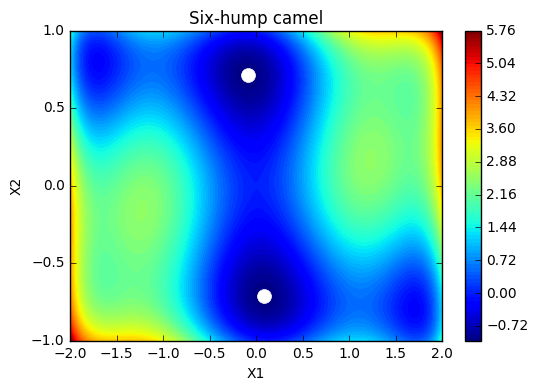

In [20]:
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

In [21]:
# Creates three identical objects that we will later use to compare the optimization strategies 
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='LCB',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

The set cost function is ignored! LBC acquisition does not make sense with cost.


In [22]:
# runs the optimization for the three methods
max_iter = 40  # maximum time 40 iterations
max_time = 60  # maximum time 60 seconds

myBopt2D.run_optimization(max_iter,max_time,verbosity=False)

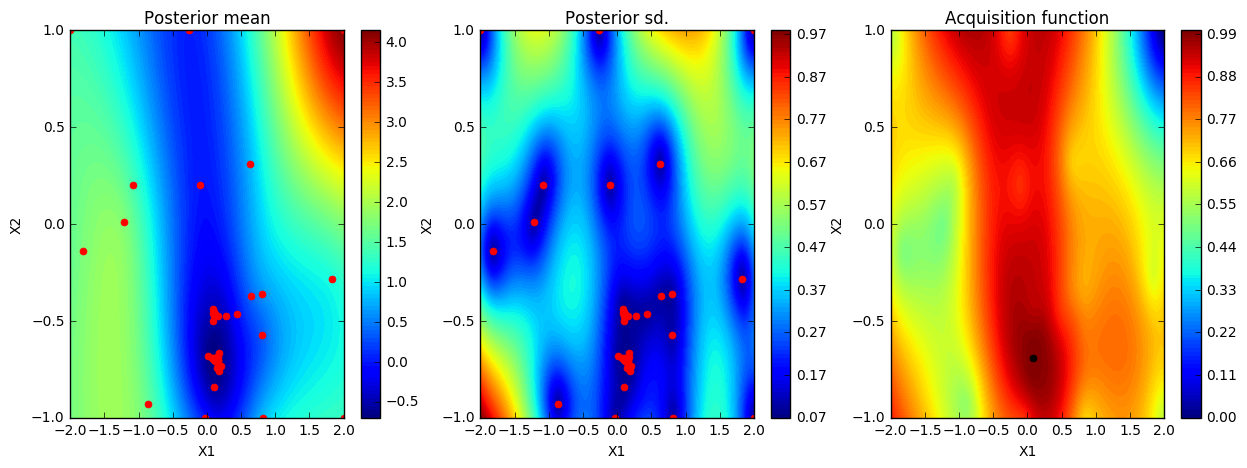

In [24]:
myBopt2D.plot_acquisition() 

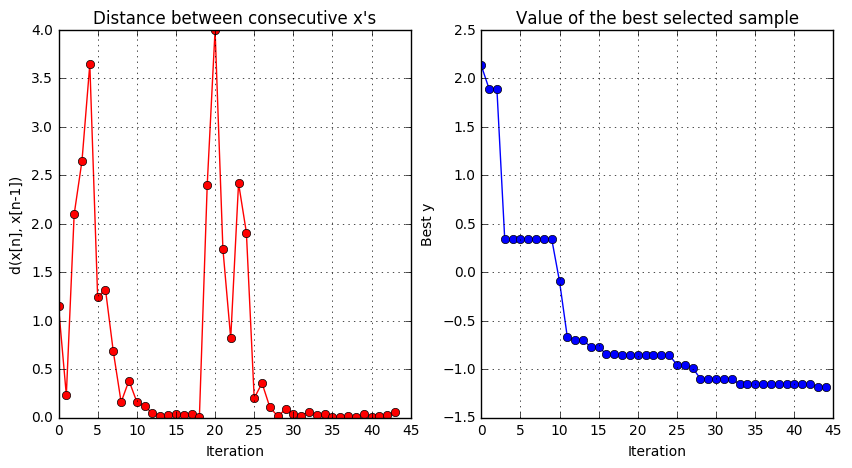

In [25]:
myBopt2D.plot_convergence()

In [27]:
#5 dimension example
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=5)

In [28]:
mixed_domain =[{'name': 'var1_2', 'type': 'continuous', 'domain': (-10,10),'dimensionality': 2},
               {'name': 'var3', 'type': 'continuous', 'domain': (-8,3)},
               {'name': 'var4', 'type': 'discrete', 'domain': (-2,0,2)},
               {'name': 'var5', 'type': 'discrete', 'domain': (-1,5)}]

In [30]:
myBopt = GPyOpt.methods.BayesianOptimization(f=func.f,                   # function to optimize       
                                             domain=mixed_domain,        # box-constrains of the problem
                                             initial_design_numdata = 20,# number data initial design
                                             acquisition_type='EI',      # Expected Improvement
                                             exact_feval = True)         # True evaluations

In [31]:
max_iter = 10
max_time = 60

myBopt.run_optimization(max_iter, max_time)

In [32]:
myBopt.X

array([[-2.18791964, -6.37843482, -7.76809339,  2.        ,  5.        ],
       [ 9.39456271, -7.81731447,  1.40009998,  0.        , -1.        ],
       [-1.08338878, -7.54497417, -5.13344248,  2.        , -1.        ],
       [ 5.12267095, -4.58277698, -2.85445224,  2.        , -1.        ],
       [-1.07523038, -0.30715713,  0.88932219, -2.        , -1.        ],
       [-3.37050961,  7.11203436, -7.50137845, -2.        , -1.        ],
       [ 0.66069338, -3.84053458, -5.08055498,  0.        , -1.        ],
       [-0.89121182, -4.636768  , -4.64052069, -2.        , -1.        ],
       [-3.01594595,  1.54508914, -5.78914417,  2.        , -1.        ],
       [ 8.54678848,  5.43294141, -4.07604304,  2.        ,  5.        ],
       [ 6.53611981, -7.38433487, -6.38322522, -2.        ,  5.        ],
       [ 9.4918732 ,  7.15498483, -6.26929709,  0.        ,  5.        ],
       [ 4.47082433, -7.84301496, -6.49264243, -2.        ,  5.        ],
       [-2.88789247,  7.8058153 ,  1.3

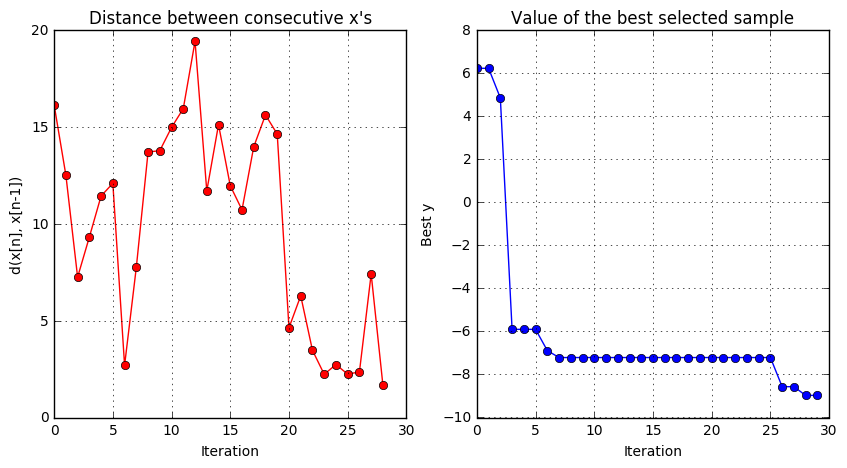

In [33]:
myBopt.plot_convergence()

In [35]:
myBopt.x_opt

array([ 3.89864922, -4.61807578, -0.92863583,  2.        ,  5.        ])